In [17]:
# Importing required libraries
import pandas as pd                                 
import numpy as np                                    
import keras
from keras.models import Sequential                  
from keras.layers import Dense, Activation             
from keras.callbacks import History 
from sklearn.metrics import confusion_matrix         
from sklearn import preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelBinarizer  
from sklearn.model_selection import KFold
import seaborn as sns                                 
import matplotlib.pyplot as plt                       
%matplotlib inline
np.random.seed(0)  

In [18]:
# Load dataset from Keras
#KEEP DATA IN THE SAME DIRECTORY ***RELATIVE FILE PATH***
data = np.loadtxt("mfcr_train.txt")
data2 = np.loadtxt("mfcr_test.txt")

In [19]:
(X_train, y_train), (X_test, y_test) =(data[:, 0:14], data[:, 14:40]), (data2[:, 0:14], data2[:, 14:40])

In [20]:
# Normalize x
X_train = X_train.astype(float) / np.amax(X_train)
X_test = X_test.astype(float) / np.amax(X_test)

# Flatten input: Changing dimension of input images from N*28*28 to N*784
X_train = X_train.reshape([X_train.shape[0], -1])
X_test = X_test.reshape([X_test.shape[0], -1])

# Transforming y using Label Binarizer from Scikit Learn
lb = LabelBinarizer()
y_test1 =  data2[:, 14:40]
y_train = lb.fit_transform(y_train)
y_test_1  = y_test
y_test = lb.fit_transform(y_test)


# Printing dimensions
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
    
# Splitting training data in training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 10)

Shape of X_train (78, 14)
Shape of y_train (78, 26)


In [21]:
i_nodes = 14
h_nodes_1 = 512
h_nodes_2 = 256
o_nodes = 26

In [22]:
model = Sequential()
history = History()
model.add(Dense(h_nodes_1, input_dim = i_nodes, kernel_initializer = 'normal', activation = 'relu'))    # Hidden Layer 1
model.add(Dense(h_nodes_2, kernel_initializer = 'normal', activation = 'relu'))                         # Hidden Layer 2
model.add(Dense(o_nodes, kernel_initializer = 'normal', activation = 'softmax'))                        # Output Layer
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])            # Compile Model
# Train Model
history = model.fit(X_train, y_train, epochs = 40, validation_data=(X_val, y_val))                     # Train Model
# Model Predictions
y_predict = model.predict_classes(X_test)
# Evaluate Model
Test_Loss, Test_Accuracy = model.evaluate(X_test, y_test)
Train_Loss, Train_Accuracy = model.evaluate(X_train, y_train)
val_Loss, val_Accuracy = model.evaluate(X_val, y_val)

Train on 62 samples, validate on 16 samples
Epoch 1/100
62/62 [==============================] - 0s 2ms/step - loss: 3.2551 - accuracy: 0.0323 - val_loss: 3.2612 - val_accuracy: 0.0625
Epoch 2/100
62/62 [==============================] - 0s 124us/step - loss: 3.2366 - accuracy: 0.1935 - val_loss: 3.2640 - val_accuracy: 0.0625
Epoch 3/100
62/62 [==============================] - 0s 118us/step - loss: 3.2211 - accuracy: 0.1452 - val_loss: 3.2670 - val_accuracy: 0.0625
Epoch 4/100
62/62 [==============================] - 0s 123us/step - loss: 3.2041 - accuracy: 0.1774 - val_loss: 3.2712 - val_accuracy: 0.0625
Epoch 5/100
62/62 [==============================] - 0s 116us/step - loss: 3.1848 - accuracy: 0.1774 - val_loss: 3.2751 - val_accuracy: 0.0625
Epoch 6/100
62/62 [==============================] - 0s 120us/step - loss: 3.1630 - accuracy: 0.1935 - val_loss: 3.2811 - val_accuracy: 0.0625
Epoch 7/100
62/62 [==============================] - 0s 122us/step - loss: 3.1383 - accuracy: 0.1935

In [23]:
print("Training Loss is: ", round(Train_Loss*100,2),"%")
print("Training Accuracy is: ", round(Train_Accuracy*100,2),"%")
print("val Loss is: ", round(val_Loss*100,2),"%")
print("val Accuracy is: ", round(val_Accuracy*100,2),"%")

Training Loss is:  16.34 %
Training Accuracy is:  98.39 %
val Loss is:  496.92 %
val Accuracy is:  56.25 %


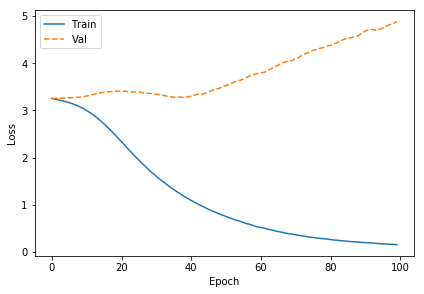

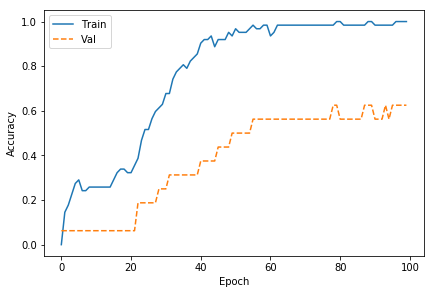

In [8]:
metrics =  ['loss', 'accuracy']
for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplots(nrows=1, ncols=1)
    plt.tight_layout()
    
    plt.plot(history.epoch,  history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],linestyle="--", label='Val')
    
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

In [9]:
# Getting Prediction Accuracies               
print("Test Accuracy is: ", (round((Test_Accuracy * 100), 2)),"%")
print("Test Loss is: ", round(Test_Loss*100,2),"%")

Test Accuracy is:  76.92 %
Test Loss is:  179.73 %


Text(0.5,51,'Predicted label')

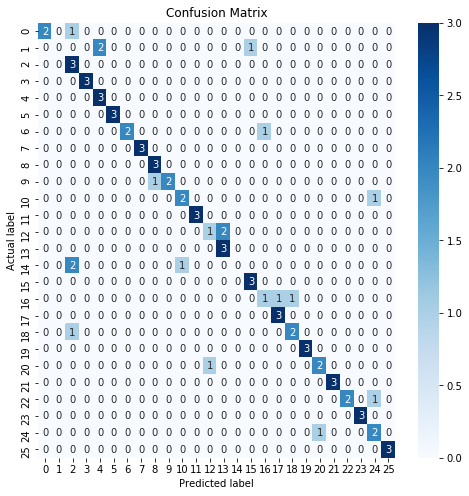

In [10]:
# Making a confustion Matrix
y_test_list = []
for rows in y_test:
    label = np.argmax(rows)
    y_test_list.append(label)
y_test = np.asarray(y_test_list);

cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
count = 1;
kfold = KFold(3, True, 1)
for train, test in kfold.split(data):
    ([current_fold_train,current_fold_test]) = (data[train], data[test])
    print("Fold %d " % count)
    print(train)
    print('train: %s, test: %s' % (current_fold_train,current_fold_test))
    count +=1
    X_train, X_val, y_train, y_val = train_test_split(current_fold_train[:, 0:14], current_fold_train[:, 14:26], test_size = 0.2, random_state = 10)
    print("Shape of X_train", X_train.shape)
    print("Shape of y_train", y_train.shape)
    i_nodes = X_train.shape[1]
    h_nodes_1 = 512
    h_nodes_2 = 256
    o_nodes = y_train.shape[1]
    model = Sequential()
    history = History()
    model.add(Dense(h_nodes_1, input_dim = i_nodes, kernel_initializer = 'normal', activation = 'relu'))    # Hidden Layer 1
    model.add(Dense(h_nodes_2, kernel_initializer = 'normal', activation = 'relu'))                         # Hidden Layer 2
    model.add(Dense(o_nodes, kernel_initializer = 'normal', activation = 'softmax'))                        # Output Layer
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])            # Compile Model

    # Train Model
    history = model.fit(X_train, y_train, epochs = 40, validation_data=(X_val, y_val))                     # Train Model
    # Model Predictions
    #y_predict = model.predict_classes(X_test)
    print("Shape of X_test", X_test.shape)
    print("Shape of y_test", y_test.shape)
    # Evaluate Model
    #y_test = y_test.reshape(78,1)
    #Test_Loss, Test_Accuracy = model.evaluate(X_test, y_test1)
    Train_Loss, Train_Accuracy = model.evaluate(X_train, y_train)
    val_Loss, val_Accuracy = model.evaluate(X_val, y_val)
    
    print("Training Loss and Training Accuracy",round(Train_Loss*100,2),"%", round(Train_Accuracy*100,2),"%")
    print("Validattion Loss and Validation Accuracy",round(val_Loss*100,2),"%", round(val_Accuracy*100,2),"%")
    print("Test Loss and Test Accuracy",round(Test_Loss*100,2),"%",round(Test_Accuracy*100,2),"%" )

Fold 1 
[ 0  1  3  4  5  6  7  8  9 11 12 13 14 16 17 18 20 21 22 23 24 25 26 28
 29 30 32 35 37 40 41 42 46 48 49 50 52 53 54 56 57 58 60 62 64 67 69 70
 72 74 75 76]
train: [[ 8.  0.  0. ...  0.  0.  0.]
 [ 7.  0.  0. ...  0.  0.  0.]
 [21. 10.  4. ...  0.  0.  0.]
 ...
 [ 0.  5.  6. ...  0.  1.  0.]
 [18.  0.  0. ...  0.  0.  1.]
 [18.  0.  0. ...  0.  0.  1.]], test: [[12. 10.  1. ...  0.  0.  0.]
 [10. 18.  3. ...  0.  0.  0.]
 [14.  9.  0. ...  0.  0.  0.]
 ...
 [ 0.  2.  8. ...  1.  0.  0.]
 [ 0. 10.  3. ...  0.  1.  0.]
 [22.  0.  0. ...  0.  0.  1.]]
Shape of X_train (41, 14)
Shape of y_train (41, 12)
Epoch 1/40
41/41 [==============================] - 0s 2ms/step - loss: 1.4279 - accuracy: 0.0488
Epoch 2/40
41/41 [==============================] - 0s 132us/step - loss: 1.1256 - accuracy: 0.2195
Epoch 3/40
41/41 [==============================] - 0s 144us/step - loss: 0.9715 - accuracy: 0.1951
Epoch 4/40
41/41 [==============================] - 0s 156us/step - loss: 0.8545 - a

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         3
           2       0.43      1.00      0.60         3
           3       1.00      1.00      1.00         3
           4       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3
           8       0.75      1.00      0.86         3
           9       1.00      0.67      0.80         3
          10       0.67      0.67      0.67         3
          11       1.00      1.00      1.00         3
          12       0.50      0.33      0.40         3
          13       0.60      1.00      0.75         3
          14       0.00      0.00      0.00         3
          15       0.75      1.00      0.86         3
          16       0.50      0.33      0.40         3
          17       0.75    

/Users/paulmathai/.virtualenvs/keras_tf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
